<a href="https://colab.research.google.com/github/nanda3-vit/ECG/blob/main/HeartbeatSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECG-Heartbeat Classification**

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/ptbdb_abnormal.csv
/content/sample_data/mitbih_train.csv
/content/sample_data/ptbdb_normal.csv
/content/sample_data/mitbih_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [8]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/sample_data/mnist_test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mitbih_test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 785 columns


In [9]:
df1.head(5)

7  0  0.1  0.2  0.3  0.4  ...  0.662  0.663  0.664  0.665  0.666  0.667
0  2  0    0    0    0    0  ...      0      0      0      0      0      0
1  1  0    0    0    0    0  ...      0      0      0      0      0      0
2  0  0    0    0    0    0  ...      0      0      0      0      0      0
3  4  0    0    0    0    0  ...      0      0      0      0      0      0
4  1  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]

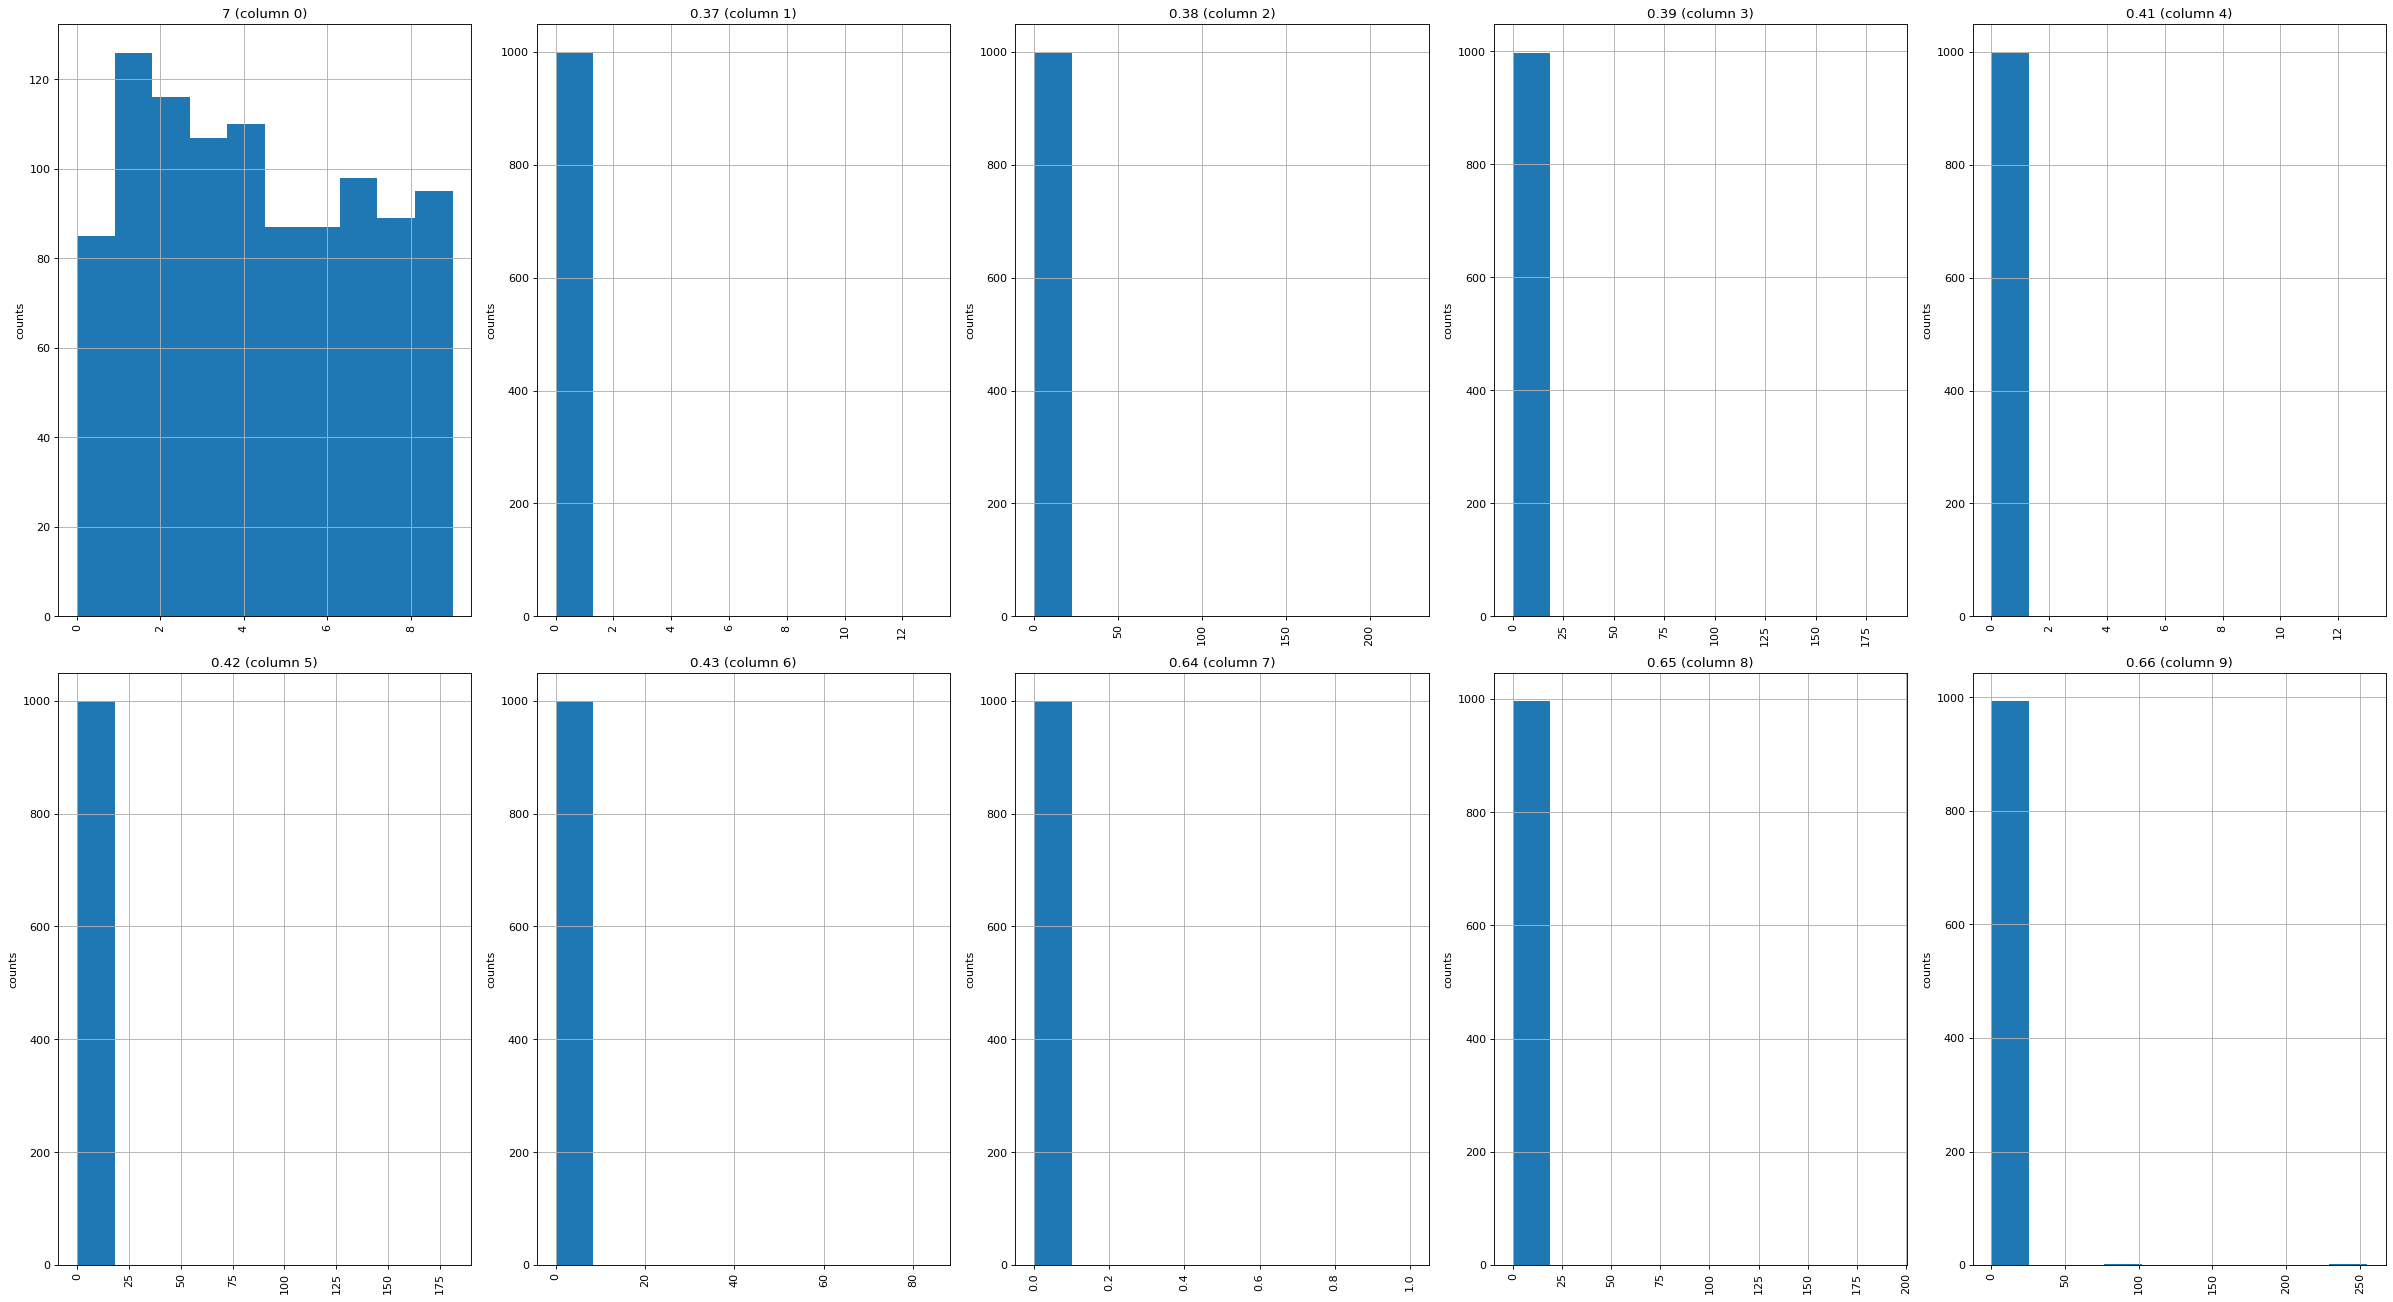

In [10]:
plotPerColumnDistribution(df1, 10, 5)

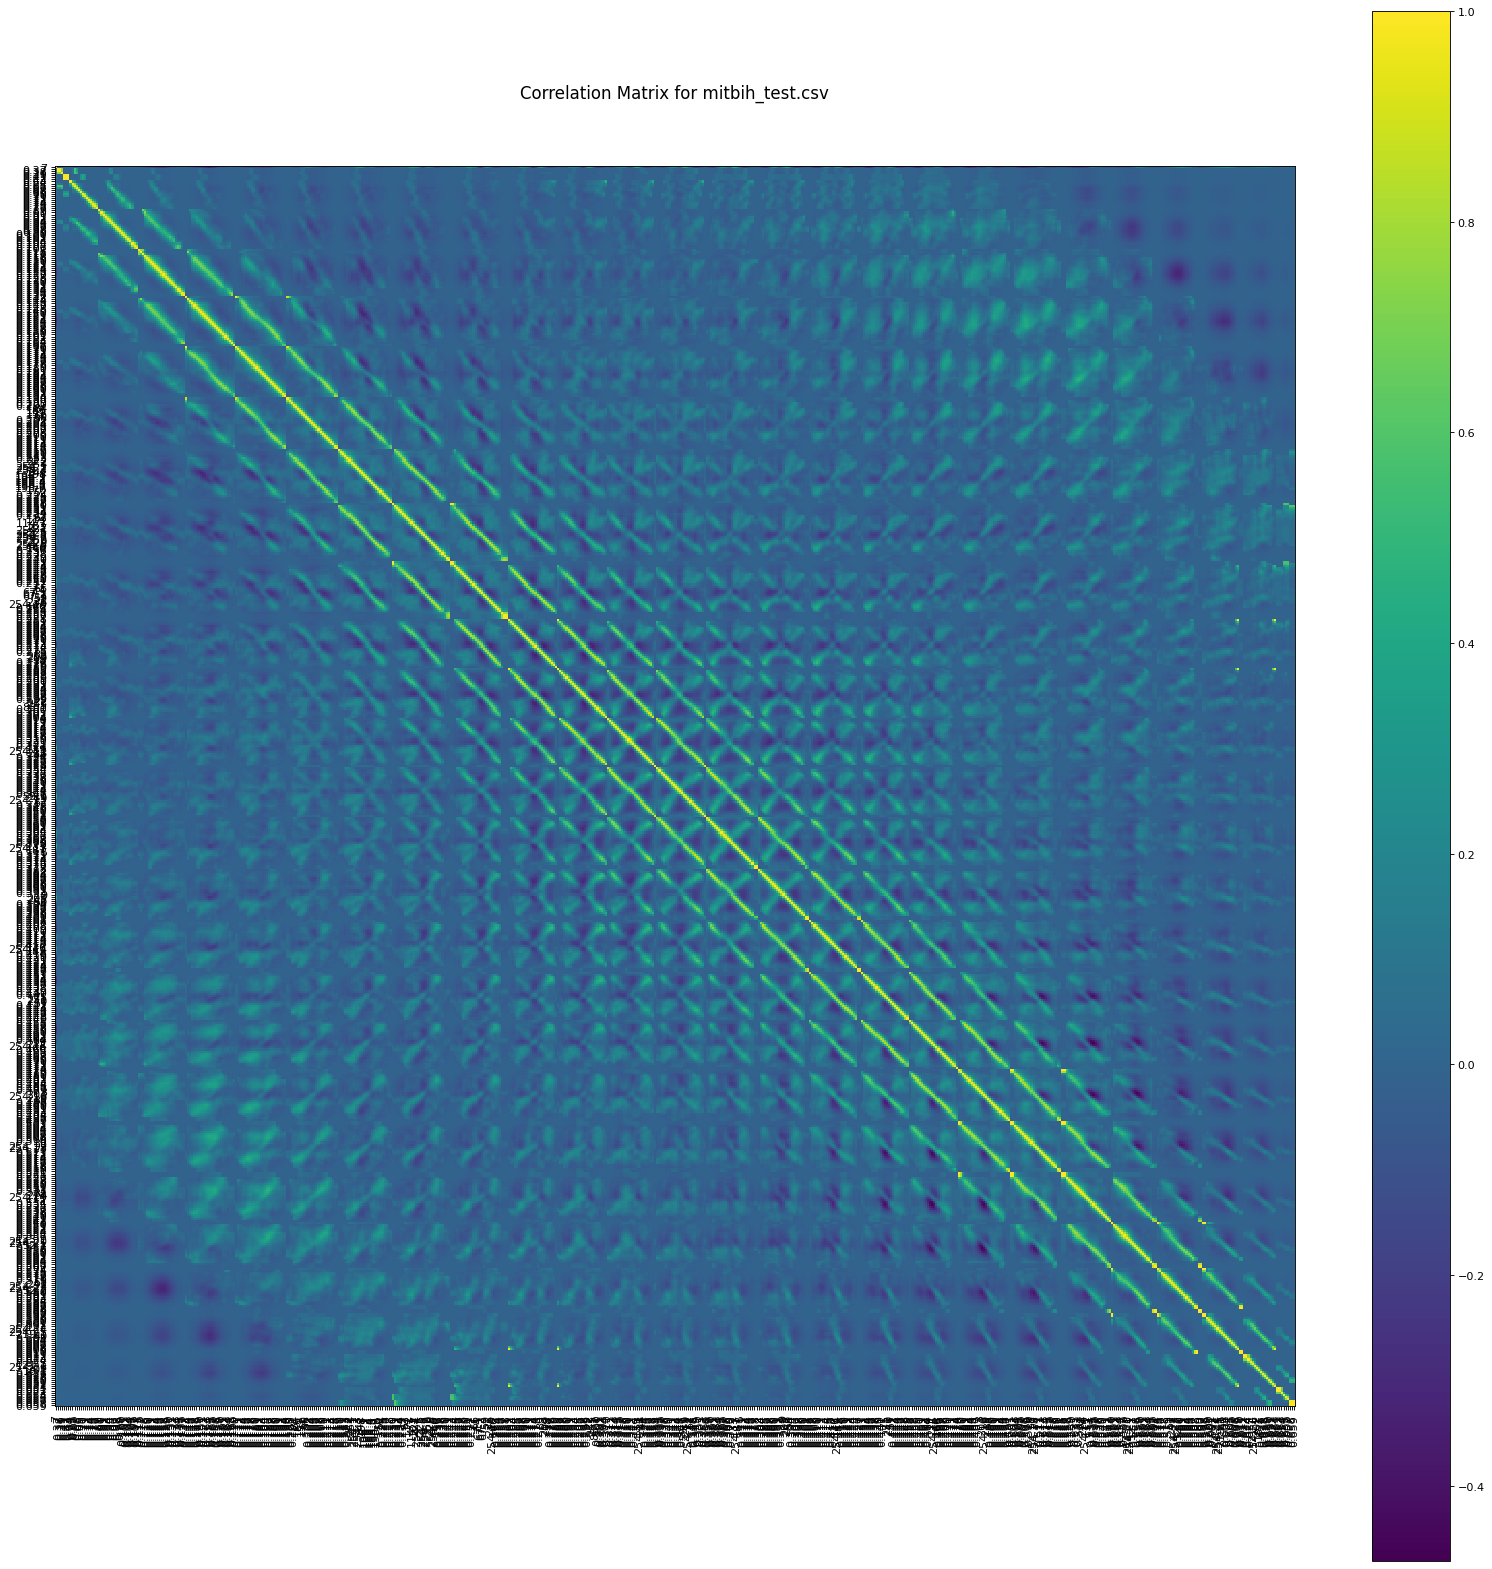

In [11]:
plotCorrelationMatrix(df1, 25)

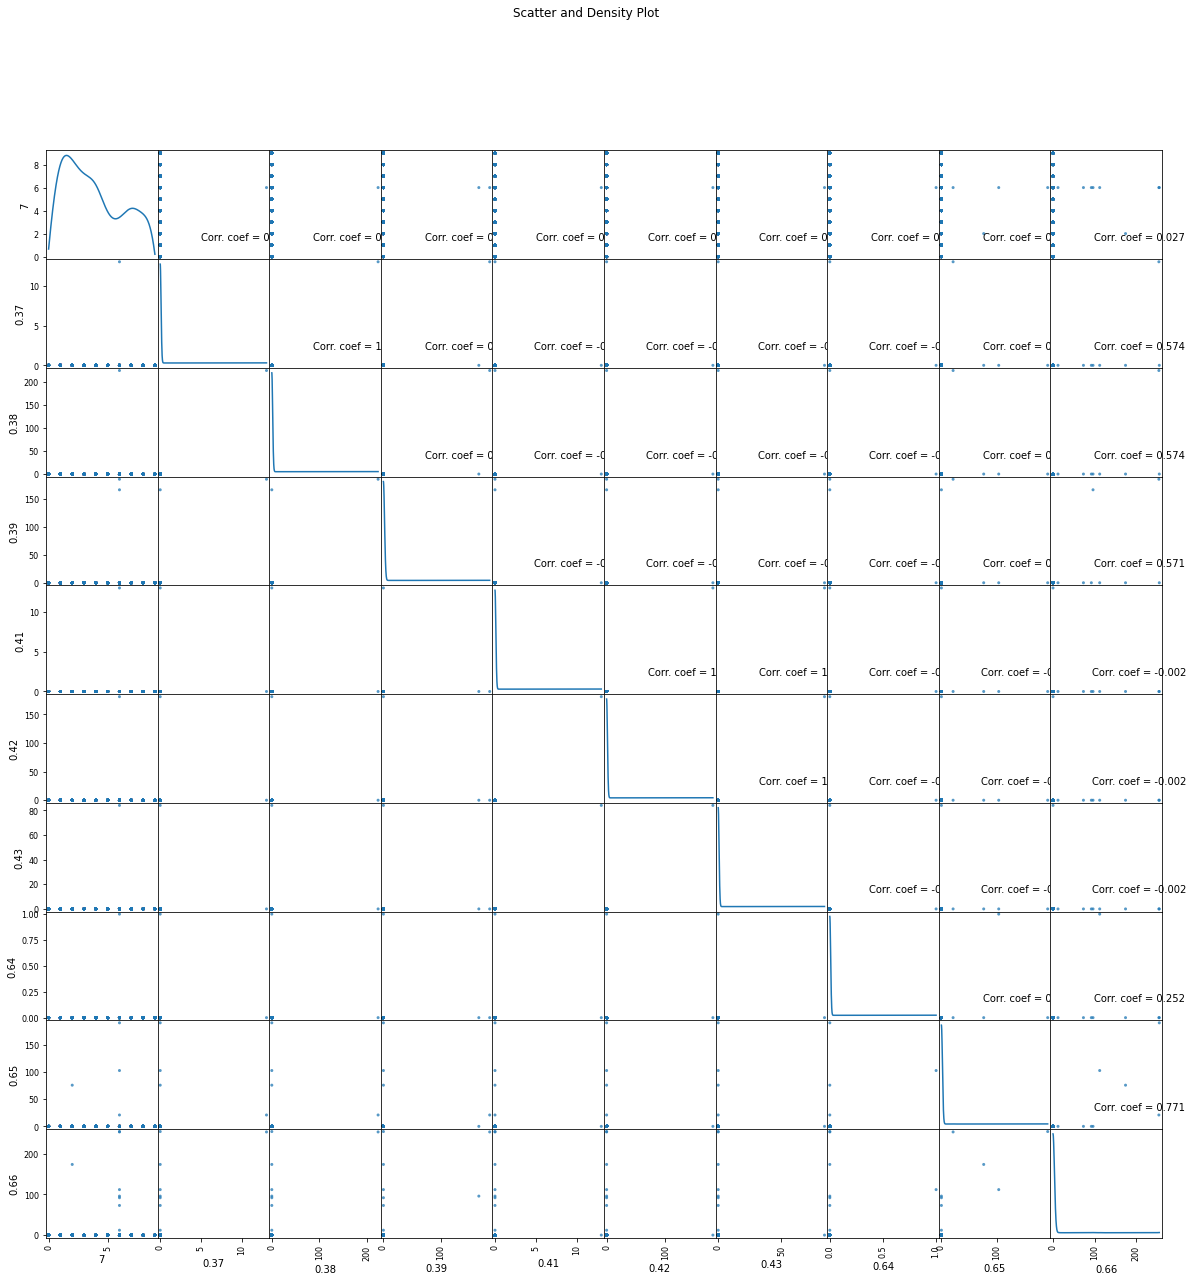

In [12]:
plotScatterMatrix(df1, 20, 10)

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/sample_data/mitbih_train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'mitbih_train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


In [14]:
df2.head(5)

9.78E-01  9.26E-01  6.81E-01  ...  0.00E+00.86  0.00E+00.87  0.00E+00.88
0     0.960     0.863     0.462  ...          0.0          0.0          0.0
1     1.000     0.659     0.186  ...          0.0          0.0          0.0
2     0.925     0.666     0.541  ...          0.0          0.0          0.0
3     0.967     1.000     0.831  ...          0.0          0.0          0.0
4     0.927     1.000     0.627  ...          0.0          0.0          0.0

[5 rows x 188 columns]

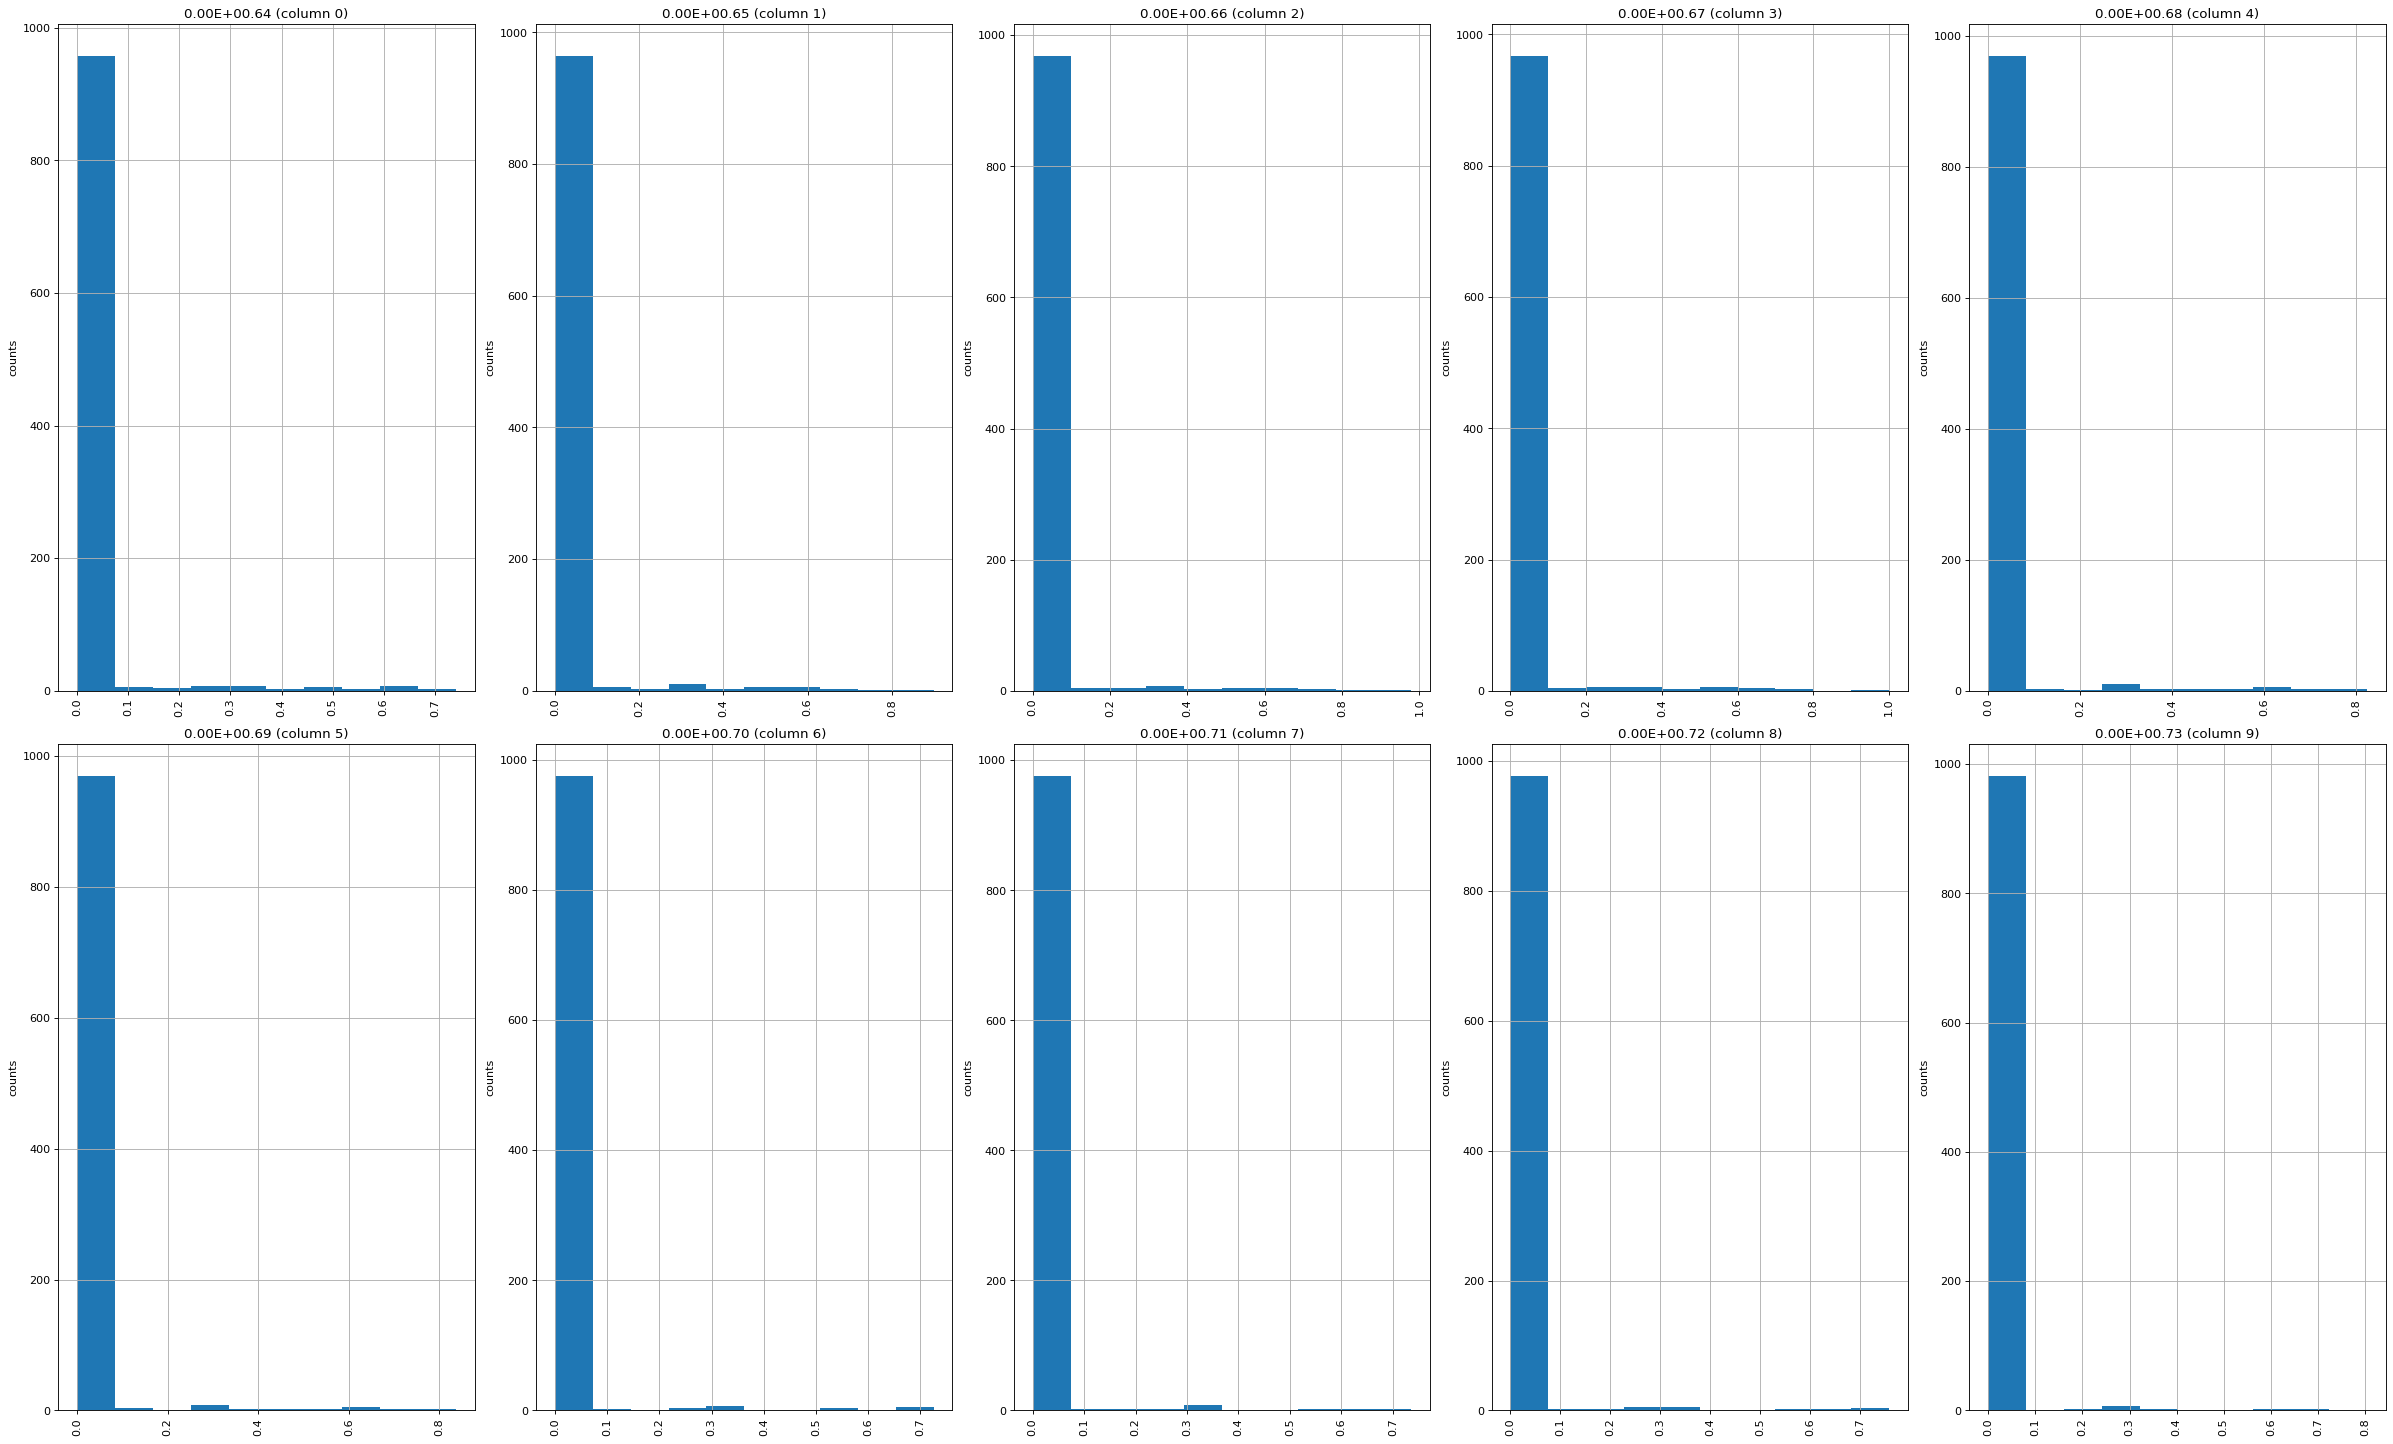

In [15]:
plotPerColumnDistribution(df2, 10, 5)

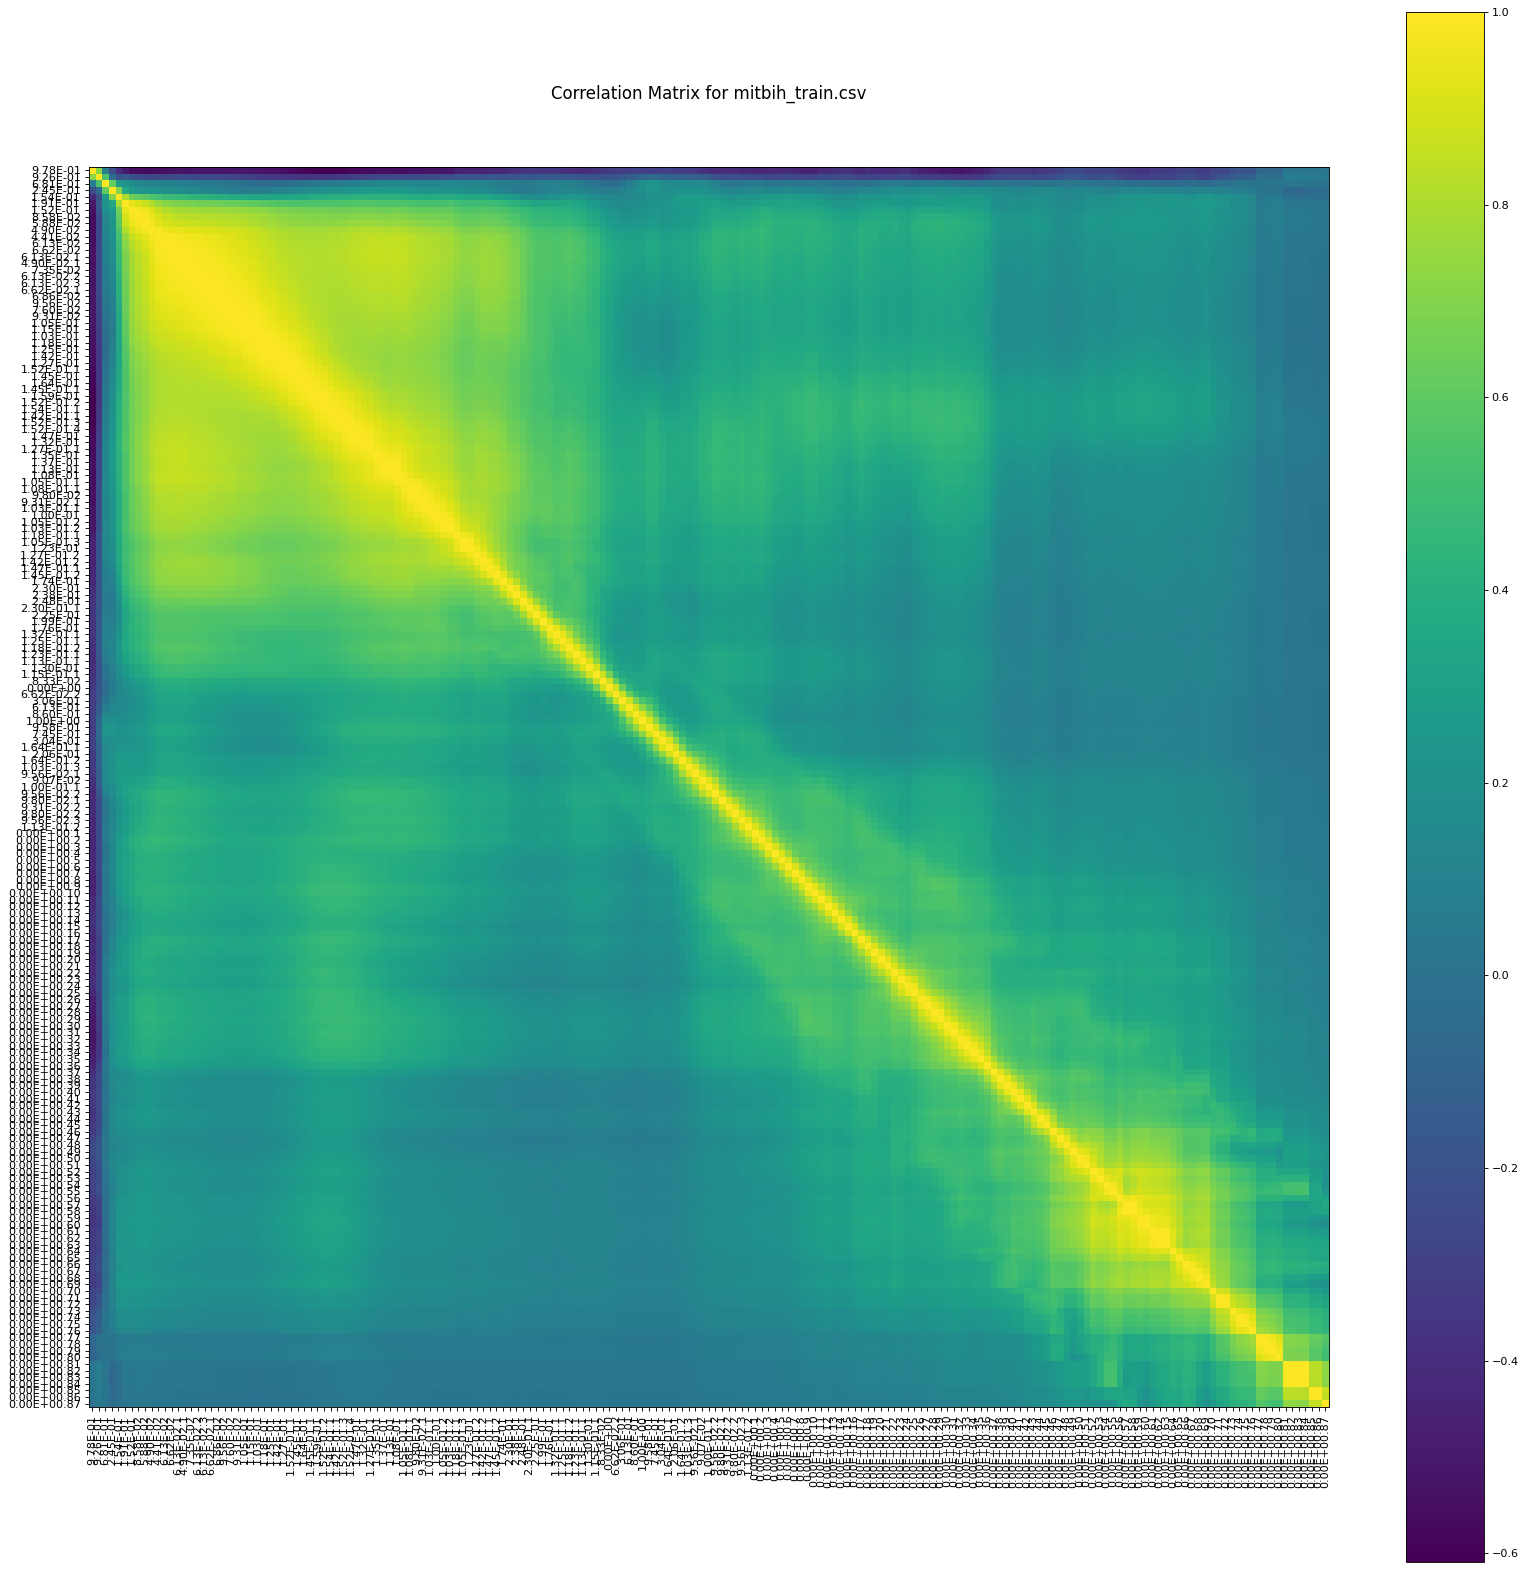

In [16]:
plotCorrelationMatrix(df2, 25)

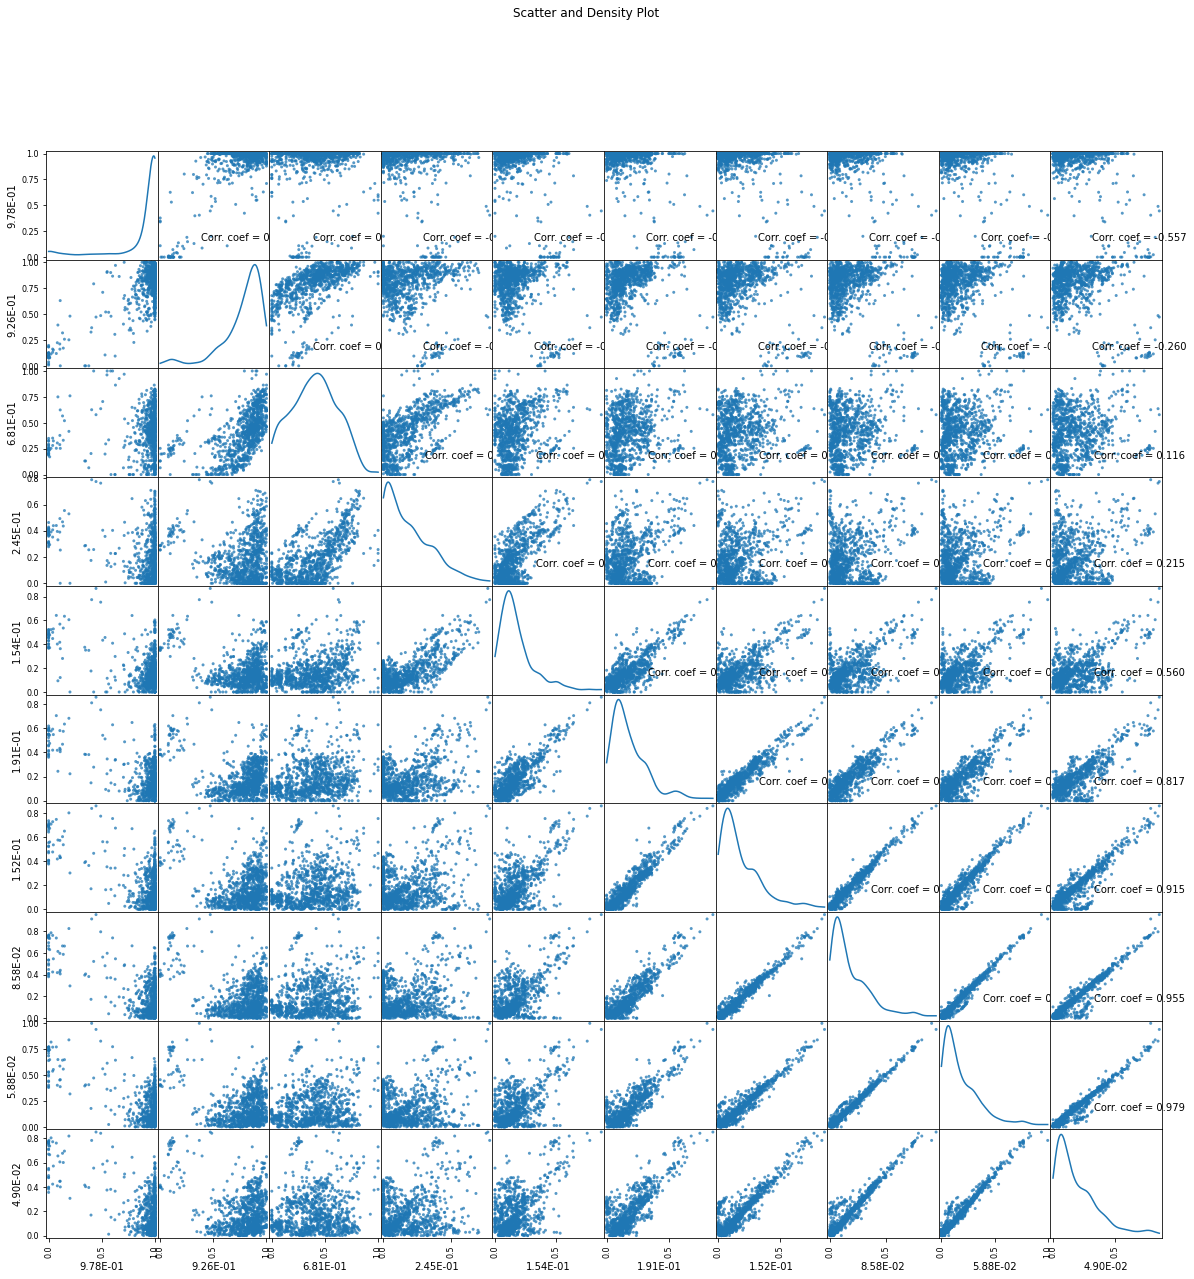

In [17]:
plotScatterMatrix(df2, 20, 10)

In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ptbdb_abnormal.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/sample_data/ptbdb_abnormal.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'ptbdb_abnormal.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


In [19]:
df3.head(5)

9.322328567504882812e-01  ...  1.000000000000000000e+00.1
0                  1.000000  ...                         1.0
1                  1.000000  ...                         1.0
2                  0.977819  ...                         1.0
3                  0.935618  ...                         1.0
4                  0.925265  ...                         1.0

[5 rows x 188 columns]

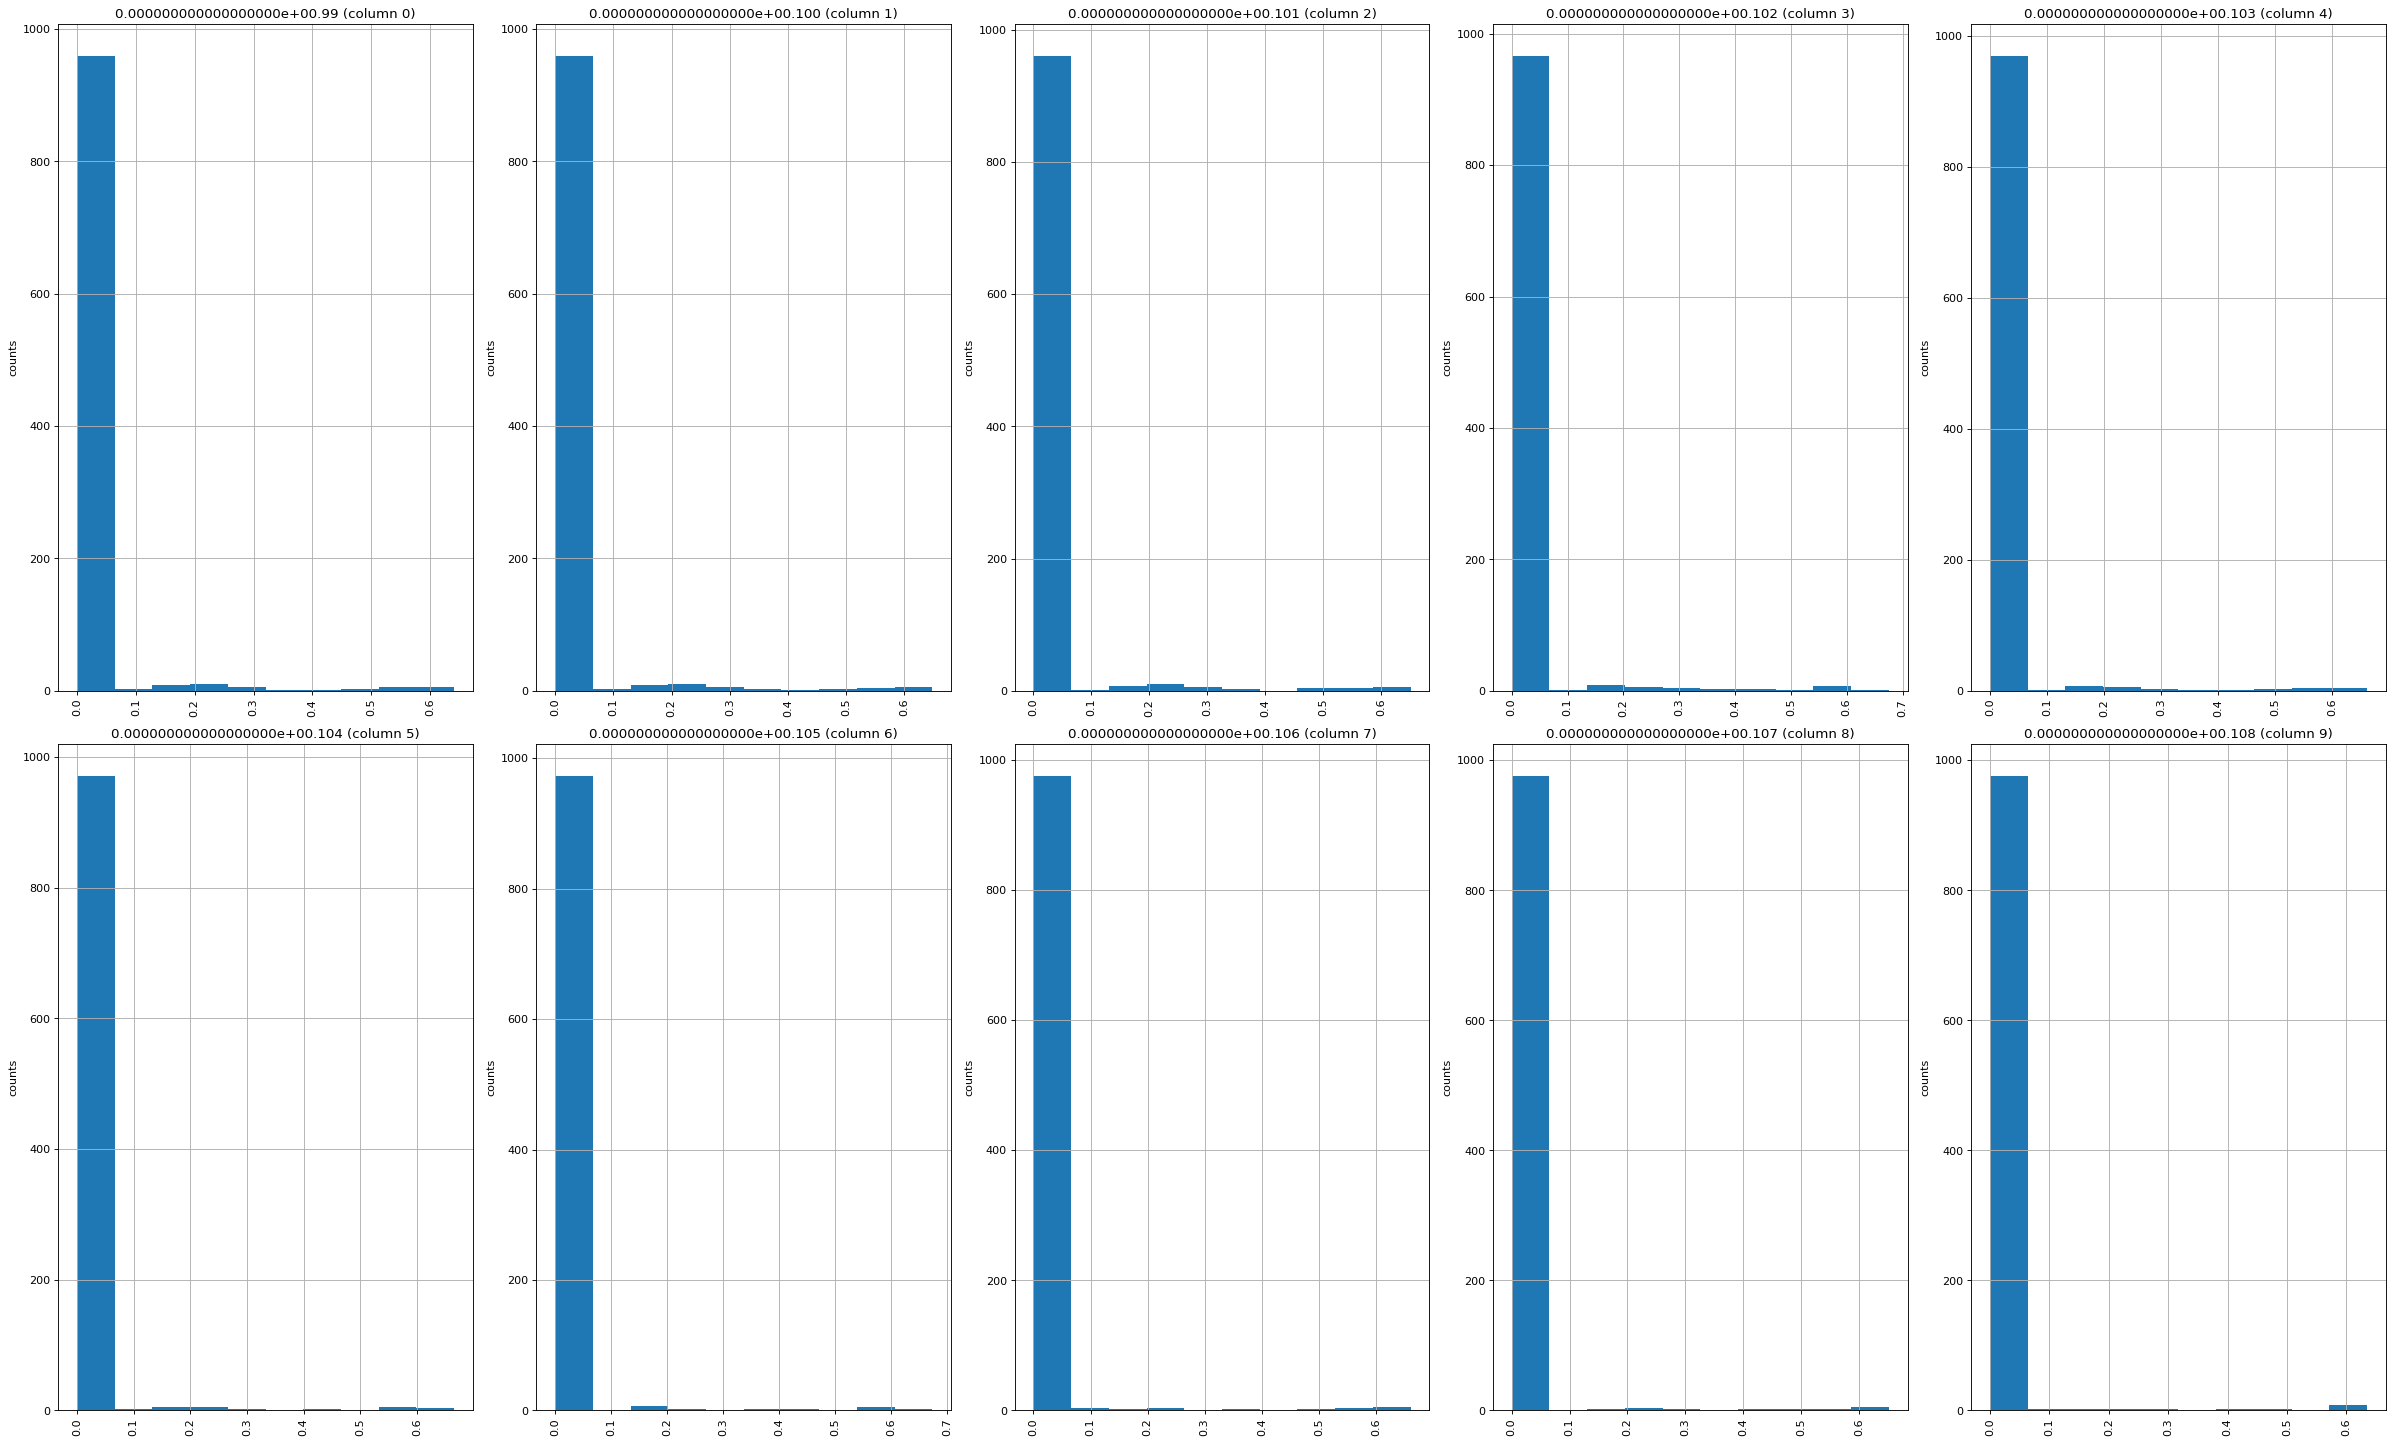

In [20]:
plotPerColumnDistribution(df3, 10, 5)

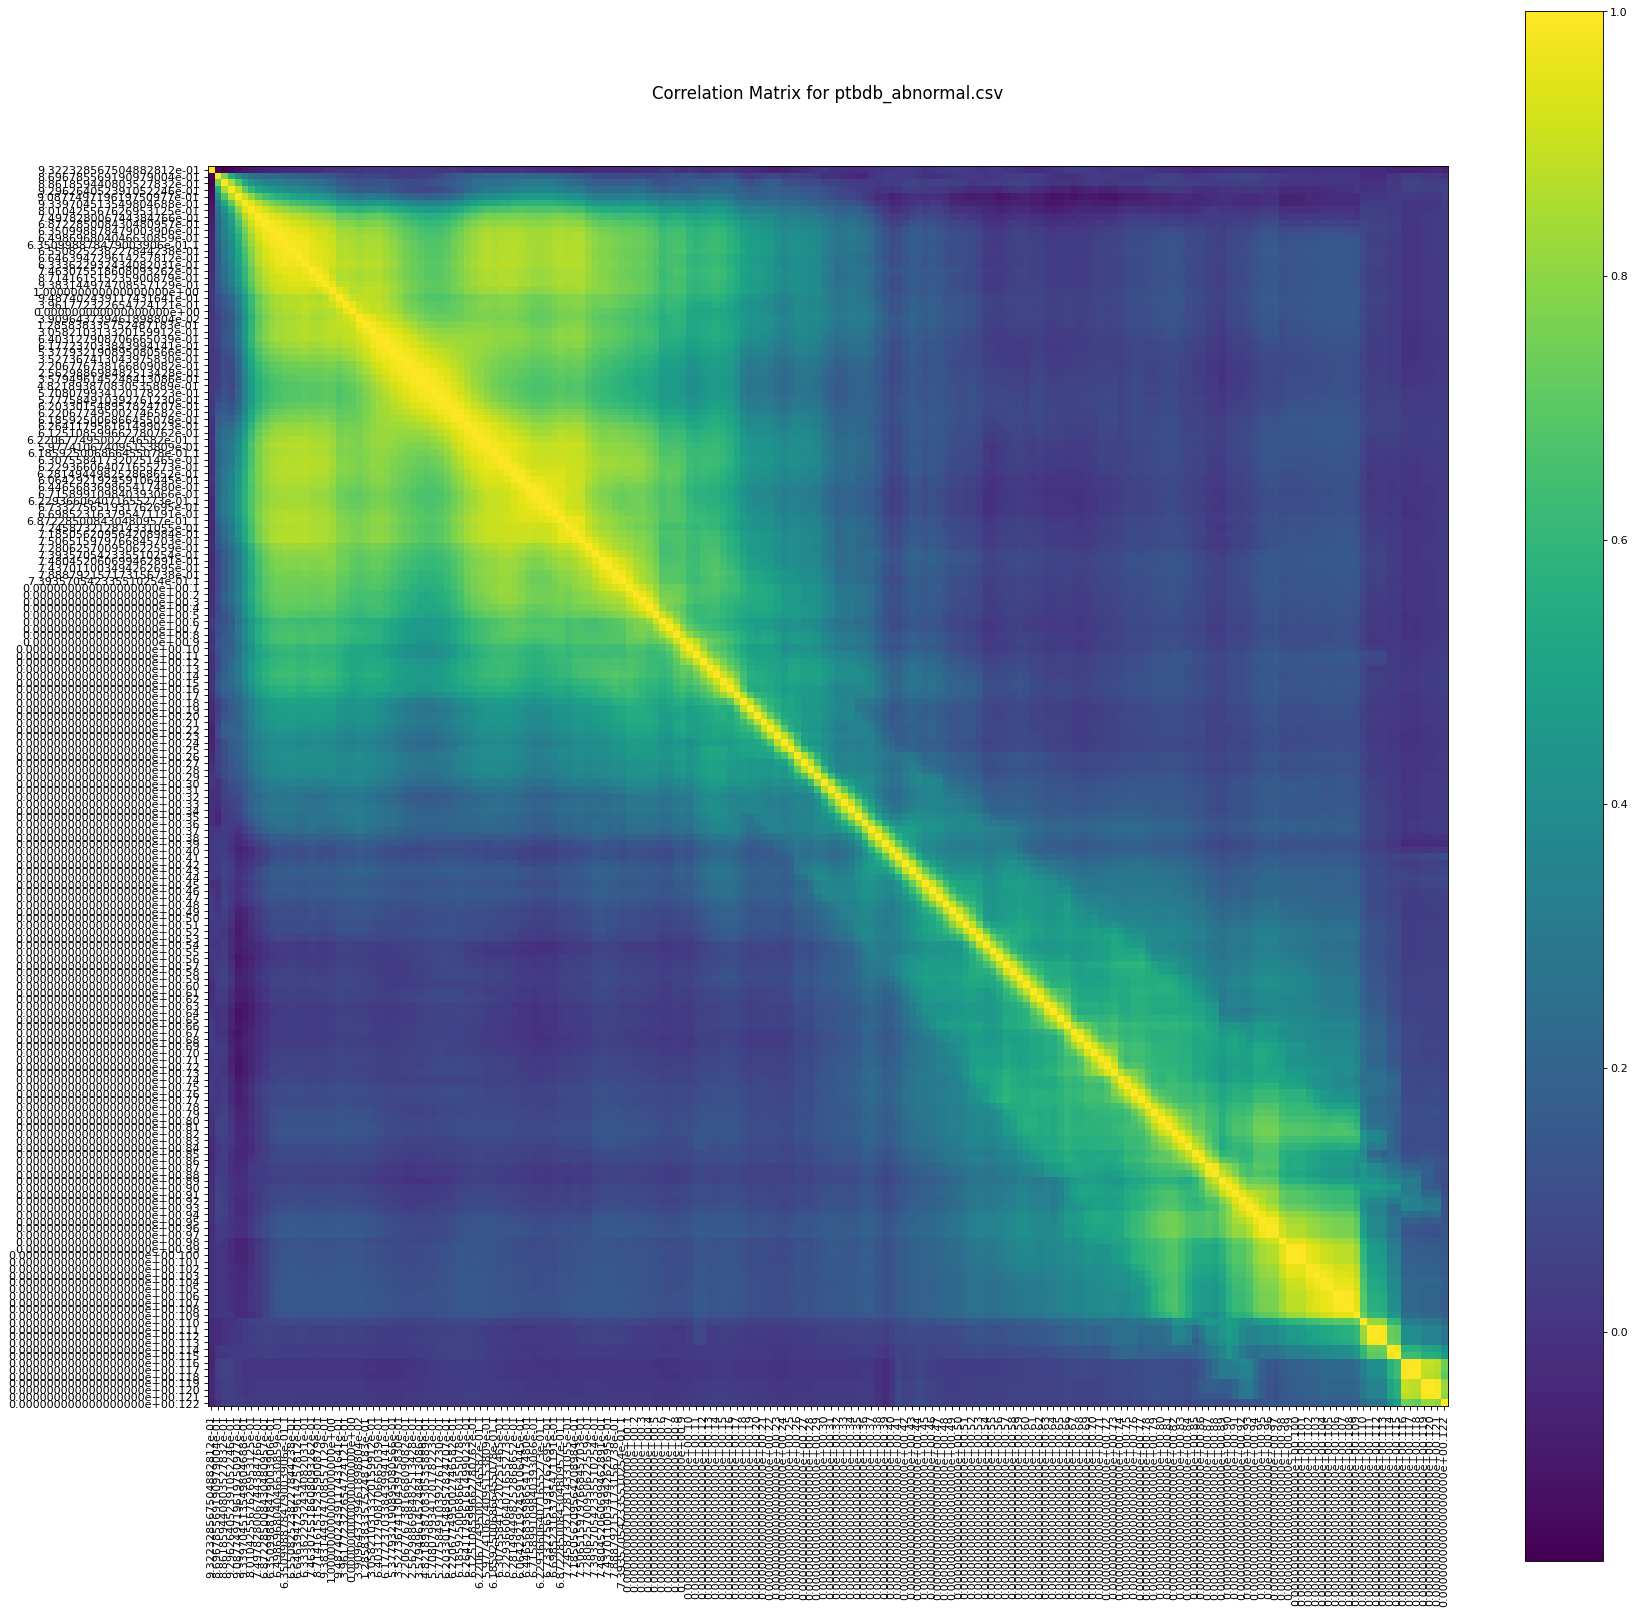

In [21]:
plotCorrelationMatrix(df3, 25)

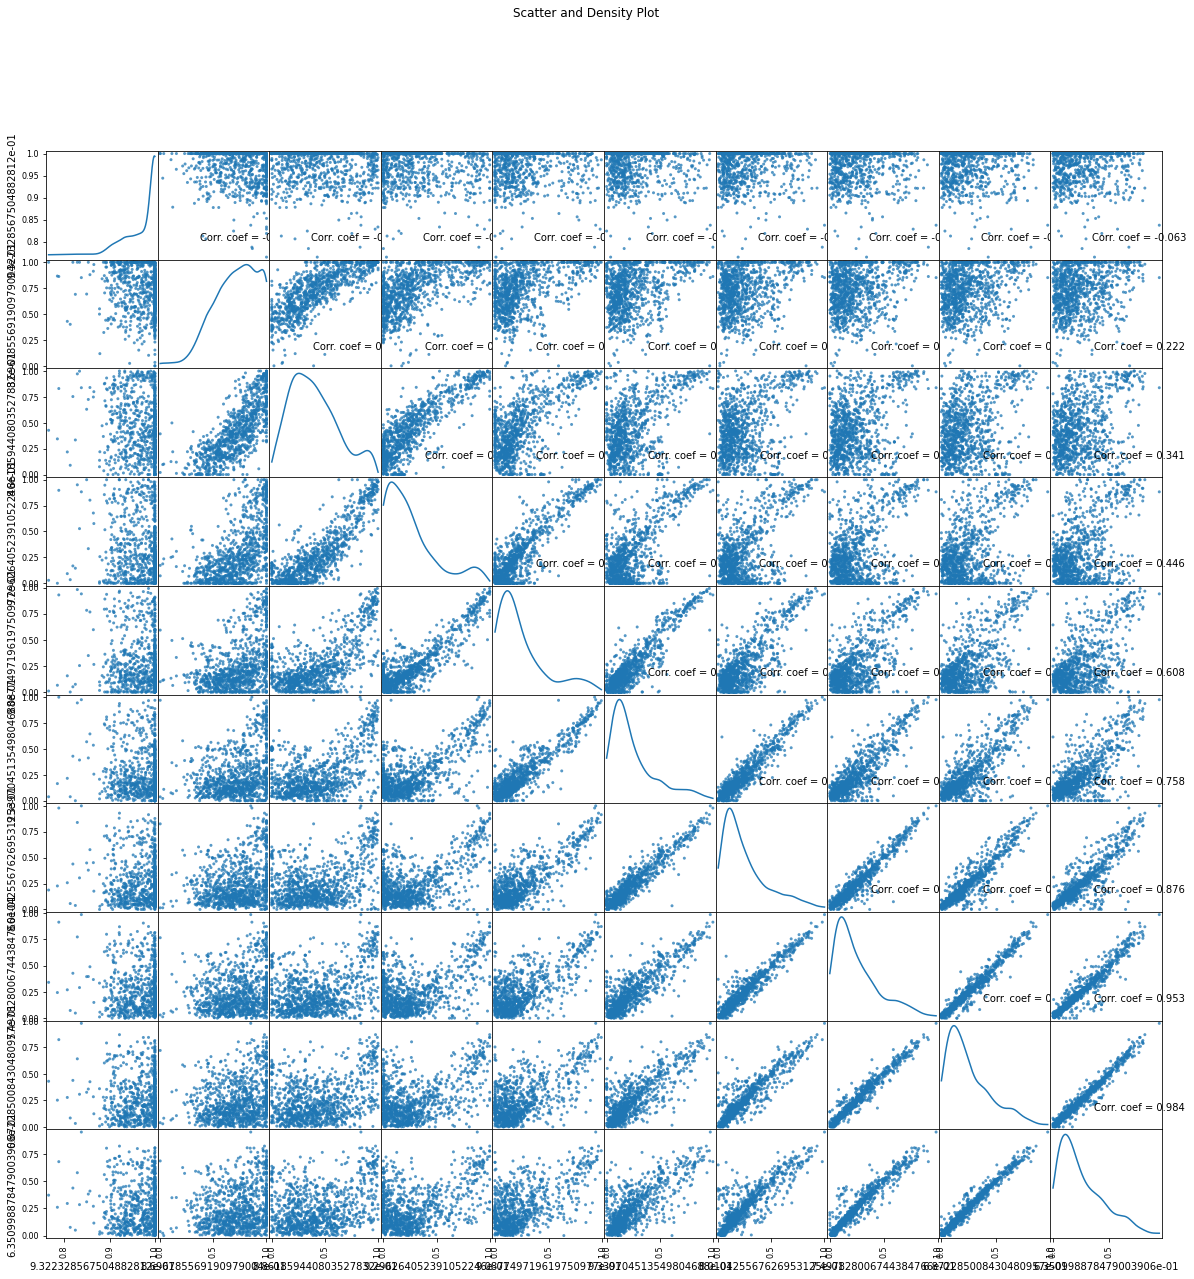

In [22]:
plotScatterMatrix(df3, 20, 10)

In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ptbdb_abnormal.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df4 = pd.read_csv('/content/sample_data/ptbdb_normal.csv', delimiter=',', nrows = nRowsRead)
df4.dataframeName = 'ptbdb_normal.csv'
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


In [24]:
df4.head(5)

1.000000000000000000e+00  ...  0.000000000000000000e+00.65
0                  1.000000  ...                          0.0
1                  0.909029  ...                          0.0
2                  1.000000  ...                          0.0
3                  1.000000  ...                          0.0
4                  0.948983  ...                          0.0

[5 rows x 188 columns]

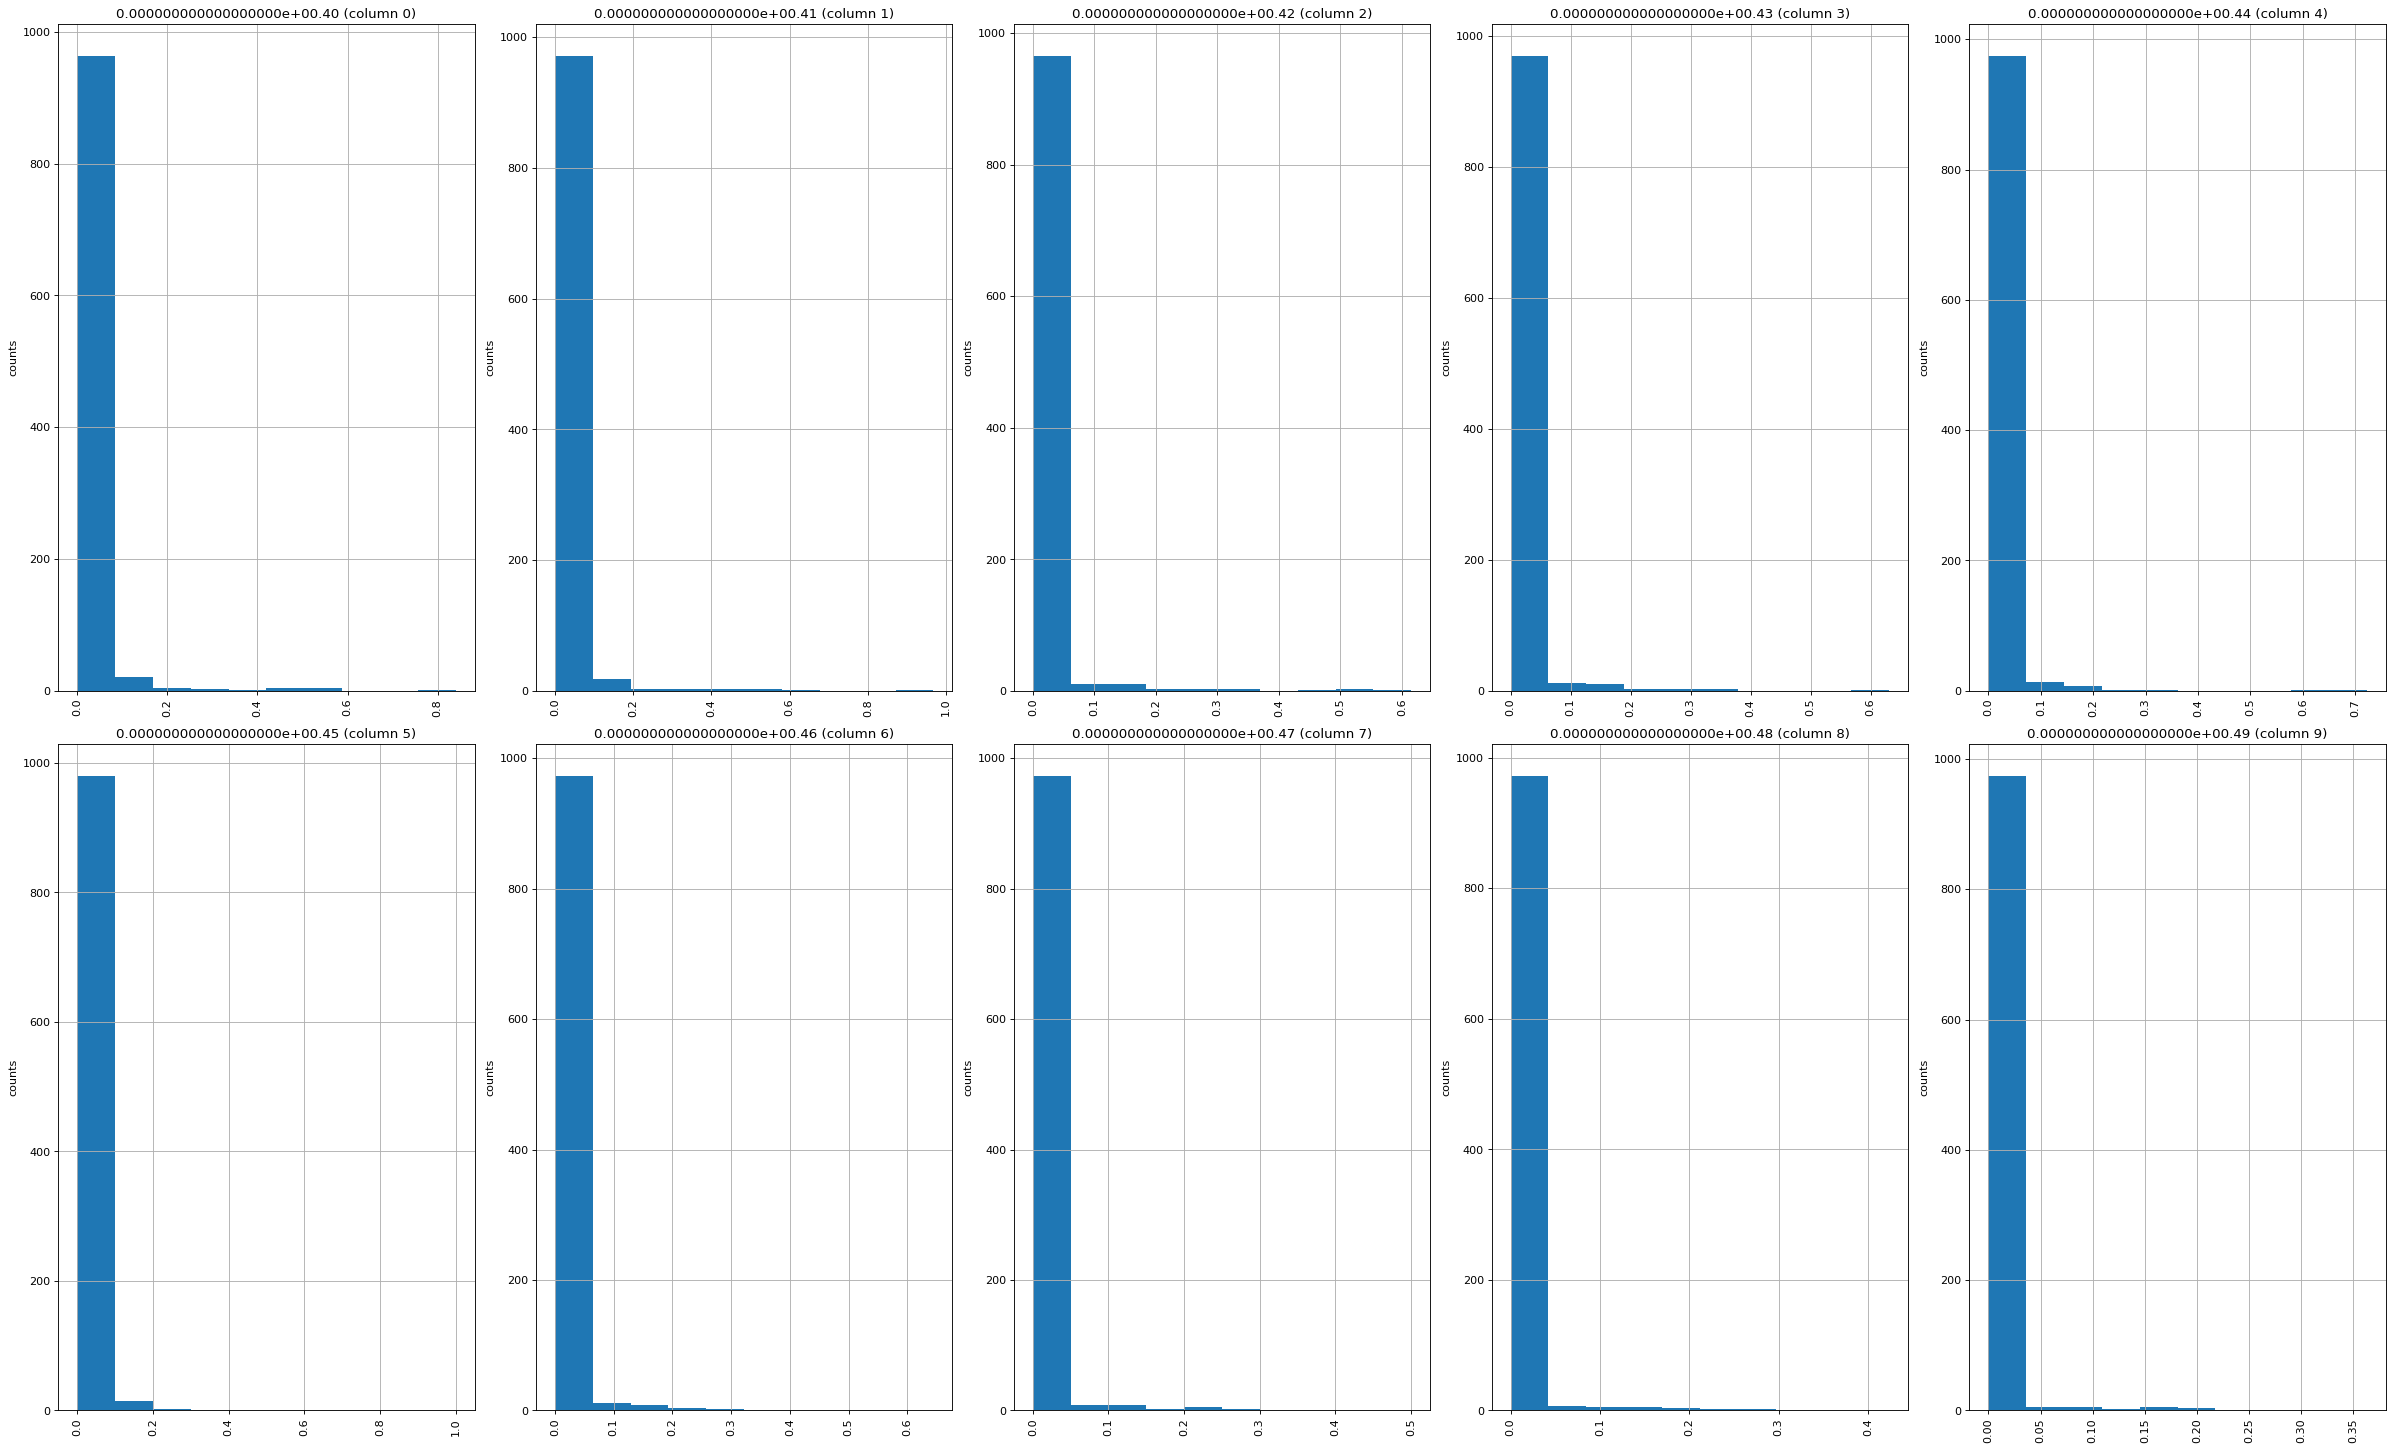

In [25]:
plotPerColumnDistribution(df4, 10, 5)

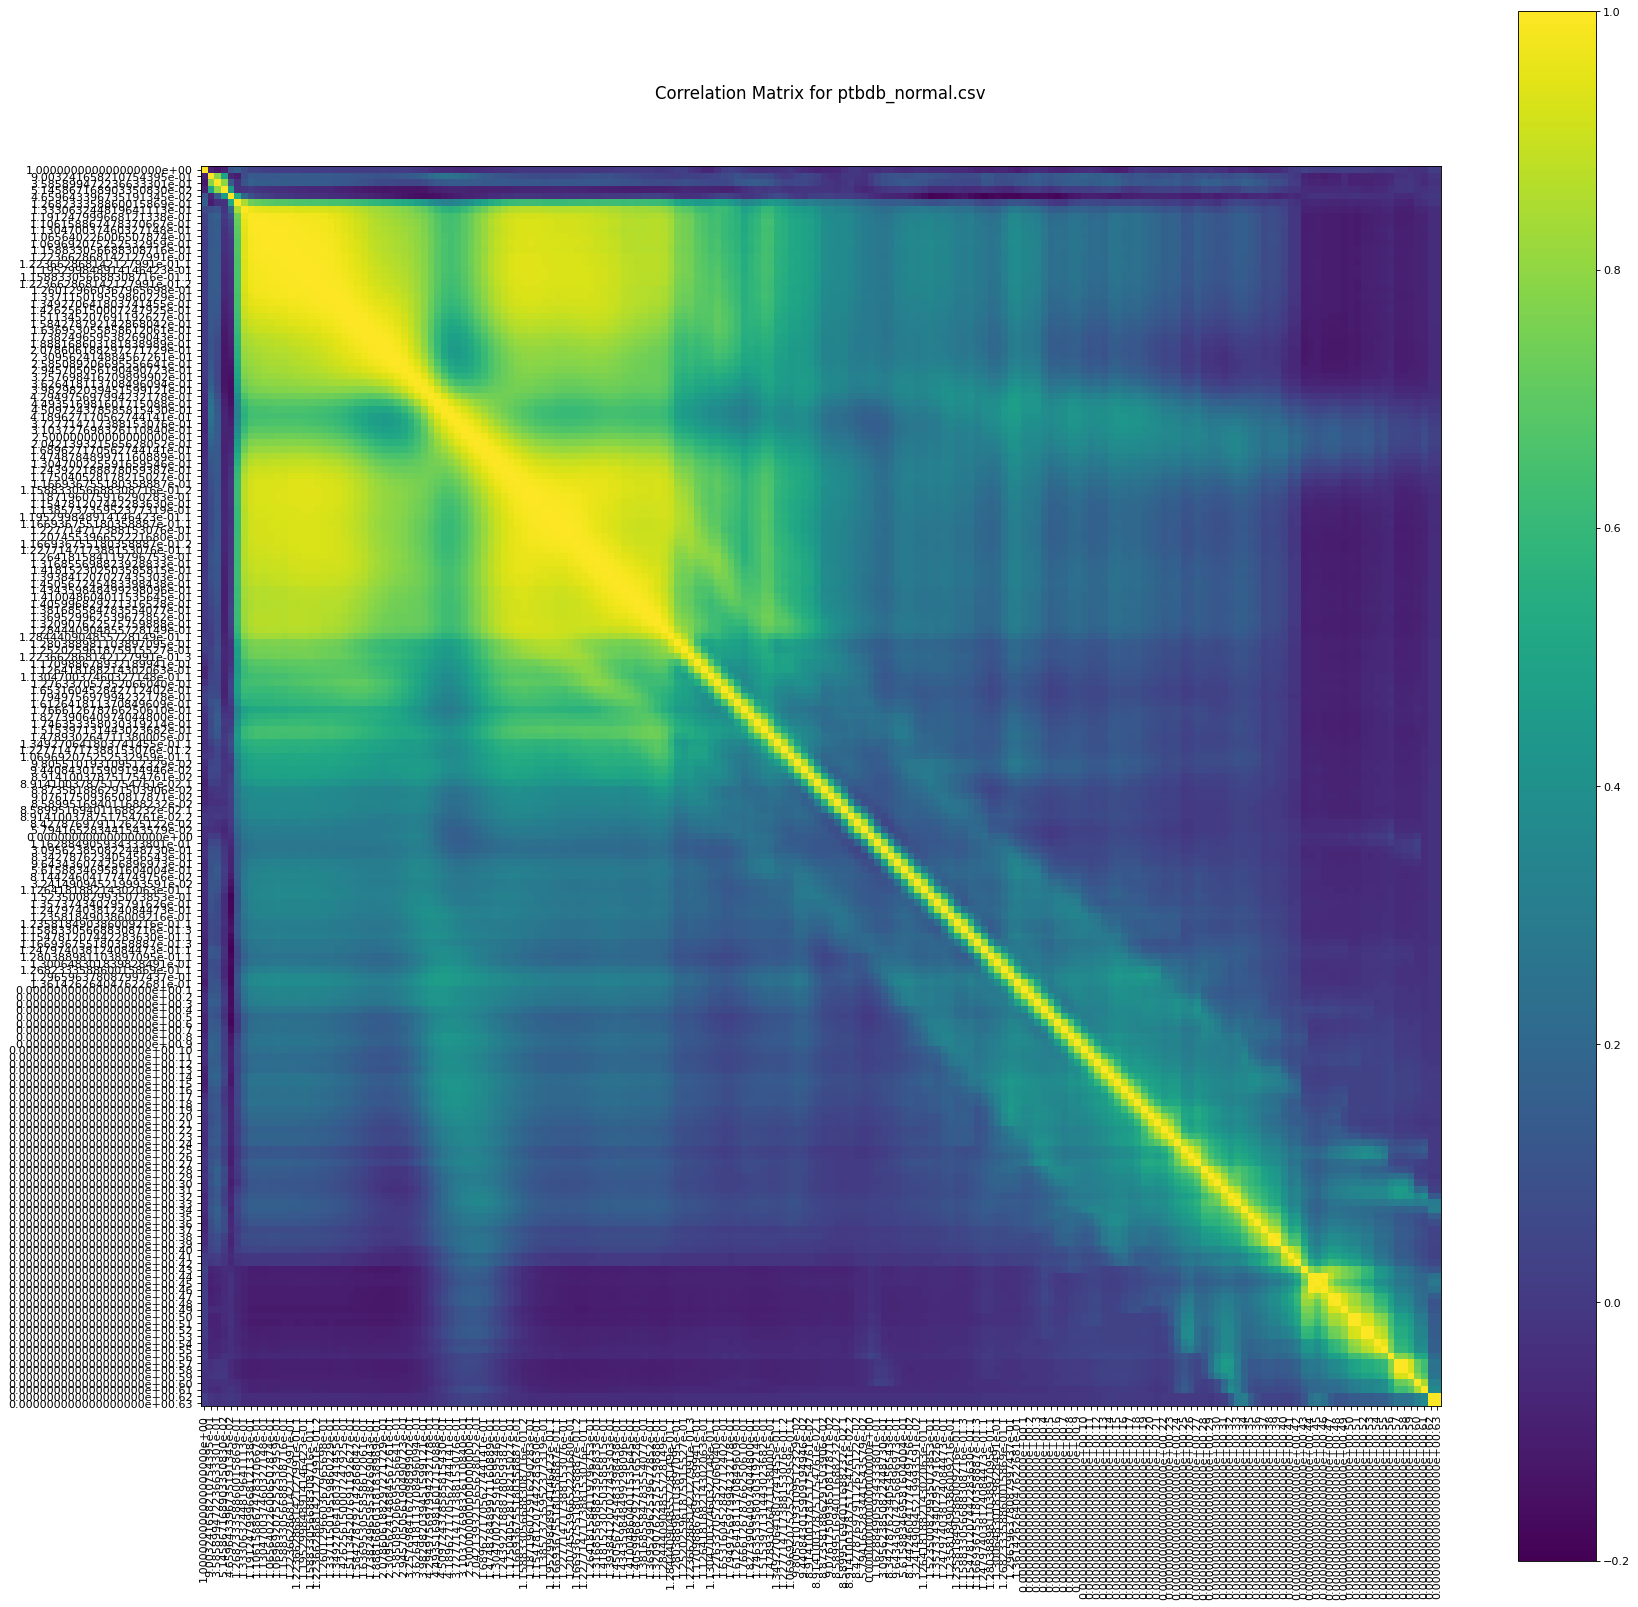

In [26]:
plotCorrelationMatrix(df4, 25)

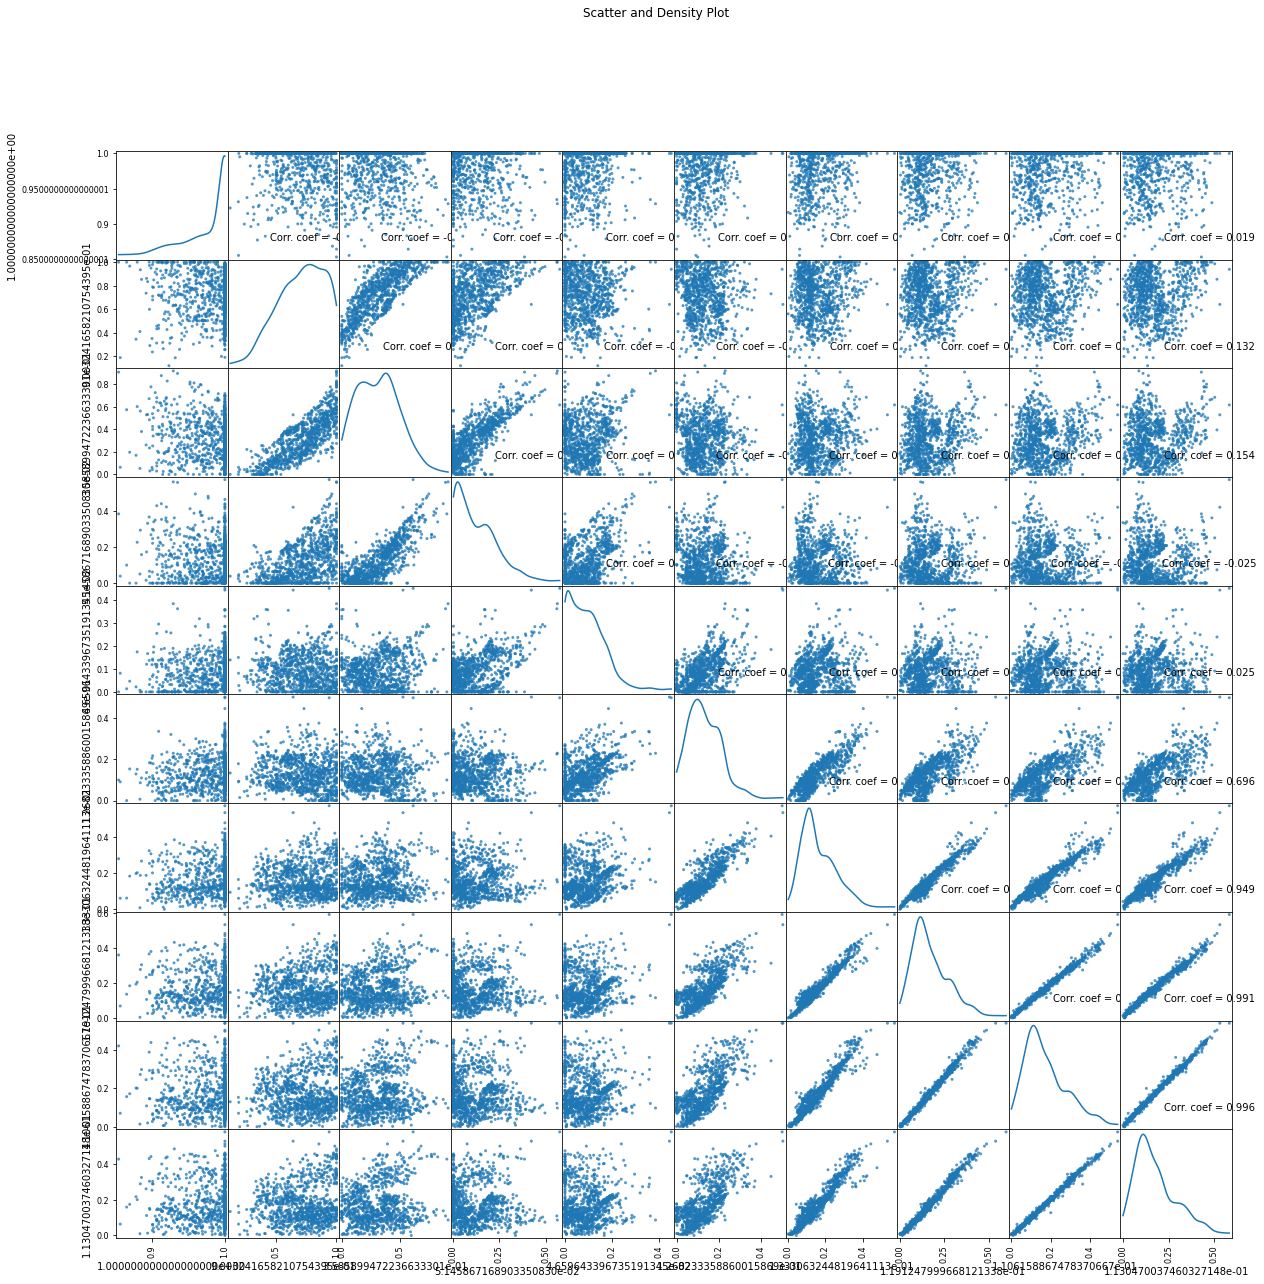

In [27]:
plotScatterMatrix(df4, 20, 10)